In [32]:
# Install the Pandas Data Reader library


##!pip install yfinance --upgrade

In [33]:
#import the required libraries

import yfinance as yf
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [34]:
#Extract the stock data from Tata Steel From National Stock Exchange India

tata = yf.download("TATASTEEL.NS")

C:\Users\kumar\AppData\Local\Temp\ipykernel_12044\4206833339.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  tata = yf.download("TATASTEEL.NS")
[*********************100%***********************]  1 of 1 completed


In [35]:
tata

Price,Close,High,Low,Open,Volume
Ticker,TATASTEEL.NS,TATASTEEL.NS,TATASTEEL.NS,TATASTEEL.NS,TATASTEEL.NS
Date,,,,,
1996-01-01,8.987900,9.010454,8.866107,8.976623,10242229
1996-01-02,8.820998,9.010455,8.798444,8.976624,16954313
1996-01-03,8.823254,9.021732,8.798444,8.820998,13514114
1996-01-04,8.543581,8.683418,8.345102,8.683418,34785820
1996-01-05,8.374422,8.480427,8.288716,8.439831,30138033
...,...,...,...,...,...
2025-06-20,151.970001,153.169998,150.630005,150.750000,29944714
2025-06-23,152.429993,153.300003,150.479996,150.500000,17096676


In [36]:
tata.columns

MultiIndex([( 'Close', 'TATASTEEL.NS'),
            (  'High', 'TATASTEEL.NS'),
            (   'Low', 'TATASTEEL.NS'),
            (  'Open', 'TATASTEEL.NS'),
            ('Volume', 'TATASTEEL.NS')],
           names=['Price', 'Ticker'])

In [37]:
# Flatten multiindex if needed
if isinstance(tata.columns, pd.MultiIndex):
    tata.columns = [col[0] for col in tata.columns]
    
# Rename columns
tata.rename(columns={
    "Close": "Price",
    "Open": "Open",
    "High": "High",
    "Low": "Low",
    "Volume": "Volume",
    "Adj Close": "Adj_close"
}, inplace=True)


In [38]:
tata

,Price,High,Low,Open,Volume
Date,,,,,
1996-01-01,8.987900,9.010454,8.866107,8.976623,10242229
1996-01-02,8.820998,9.010455,8.798444,8.976624,16954313
1996-01-03,8.823254,9.021732,8.798444,8.820998,13514114
1996-01-04,8.543581,8.683418,8.345102,8.683418,34785820
1996-01-05,8.374422,8.480427,8.288716,8.439831,30138033
...,...,...,...,...,...
2025-06-20,151.970001,153.169998,150.630005,150.750000,29944714
2025-06-23,152.429993,153.300003,150.479996,150.500000,17096676
2025-06-24,154.789993,156.970001,153.639999,153.800003,25403324


In [39]:
tata.to_csv("tatasteel_stock.csv")

<Axes: xlabel='Date'>

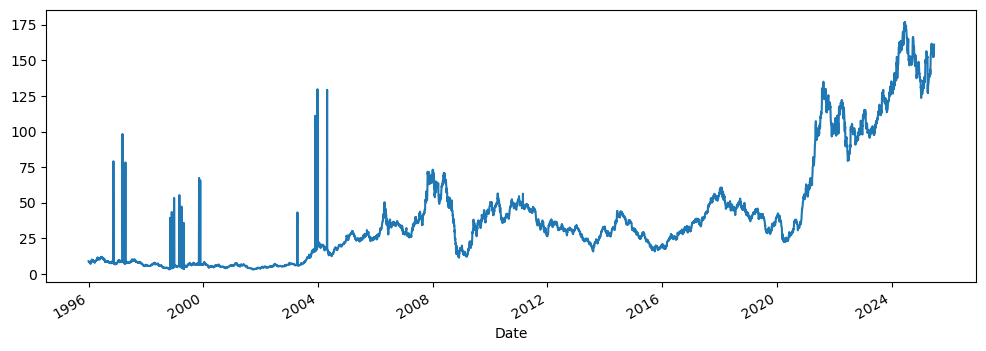

In [40]:
#Ploting

tata["High"].plot(figsize=(12,4))

<Axes: xlabel='Date'>

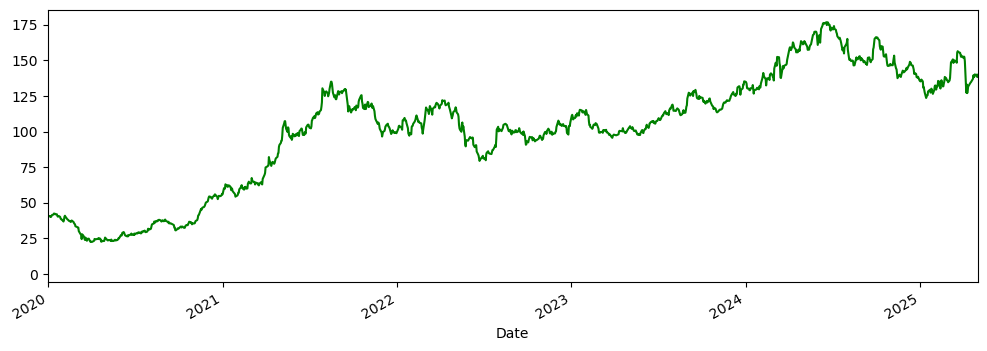

In [41]:
#x limit

tata["High"].plot(xlim=["2020-01","2025-05"],figsize=(12,4),c="green")

<Axes: xlabel='Date'>

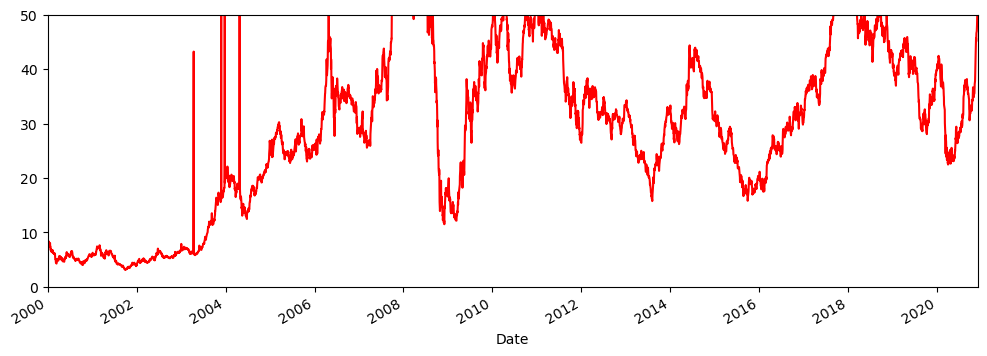

In [42]:
#x and y limits

tata["High"].plot(xlim=["2000-01","2020-12"],ylim=[0,50],figsize=(12,4),c="red")

In [43]:
#indexing from 2020-02-01 to 2020-03-01

index =  tata.loc['2020-02-01':'2020-03-01'].index

share_open = tata.loc['2020-02-01':'2020-03-01']['Open']

In [44]:
share_open

Date
2020-02-03    35.075520
2020-02-04    37.089420
2020-02-05    37.949527
2020-02-06    40.110276
2020-02-07    39.917283
2020-02-10    38.620832
2020-02-11    37.622269
2020-02-12    37.760722
2020-02-13    37.655831
2020-02-14    37.005510
2020-02-17    36.543988
2020-02-18    36.418118
2020-02-19    36.623711
2020-02-20    35.998558
2020-02-24    36.489443
2020-02-25    35.159430
2020-02-26    34.513302
2020-02-27    34.815383
2020-02-28    33.456000
Name: Open, dtype: float64

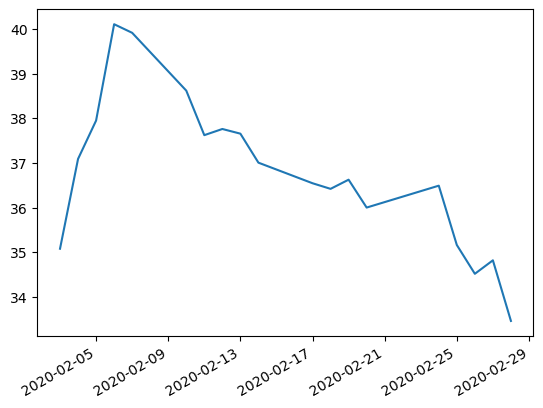

In [45]:
#Ploting the index and Share open of 2020 February 
figure,axis = plt.subplots()

#To prevent dates overlapping, we use autofmt_xdate function
figure.autofmt_xdate()

axis.plot(index,share_open)

In [46]:
tata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7405 entries, 1996-01-01 to 2025-06-26
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   7405 non-null   float64
 1   High    7405 non-null   float64
 2   Low     7405 non-null   float64
 3   Open    7405 non-null   float64
 4   Volume  7405 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 605.1 KB


In [47]:
tata = tata.reset_index()

In [48]:
tata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7405 entries, 0 to 7404
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    7405 non-null   datetime64[ns]
 1   Price   7405 non-null   float64       
 2   High    7405 non-null   float64       
 3   Low     7405 non-null   float64       
 4   Open    7405 non-null   float64       
 5   Volume  7405 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 347.2 KB


In [49]:
pd.to_datetime(tata['Date'])

0      1996-01-01
1      1996-01-02
2      1996-01-03
3      1996-01-04
4      1996-01-05
          ...    
7400   2025-06-20
7401   2025-06-23
7402   2025-06-24
7403   2025-06-25
7404   2025-06-26
Name: Date, Length: 7405, dtype: datetime64[ns]

In [50]:
tata = tata.set_index('Date', drop = True)

In [51]:
tata

,Price,High,Low,Open,Volume
Date,,,,,
1996-01-01,8.987900,9.010454,8.866107,8.976623,10242229
1996-01-02,8.820998,9.010455,8.798444,8.976624,16954313
1996-01-03,8.823254,9.021732,8.798444,8.820998,13514114
1996-01-04,8.543581,8.683418,8.345102,8.683418,34785820
1996-01-05,8.374422,8.480427,8.288716,8.439831,30138033
...,...,...,...,...,...
2025-06-20,151.970001,153.169998,150.630005,150.750000,29944714
2025-06-23,152.429993,153.300003,150.479996,150.500000,17096676
2025-06-24,154.789993,156.970001,153.639999,153.800003,25403324


In [59]:
#Time Resampling 

tata.head()

,Price,High,Low,Open,Volume
Date,,,,,
1996-01-01,8.987900,9.010454,8.866107,8.976623,10242229
1996-01-02,8.820998,9.010455,8.798444,8.976624,16954313
1996-01-03,8.823254,9.021732,8.798444,8.820998,13514114
1996-01-04,8.543581,8.683418,8.345102,8.683418,34785820
1996-01-05,8.374422,8.480427,8.288716,8.439831,30138033


In [60]:
# year end frequency

tata.resample(rule='A').min()

,Price,High,Low,Open,Volume
Date,,,,,
1996-12-31,6.678337,6.766299,6.585865,6.687357,0
1997-12-31,5.327331,5.485212,5.255158,5.322821,0
1998-12-31,3.157606,3.252334,3.092199,3.202715,0
1999-12-31,3.416981,3.518475,3.367361,3.383149,0
2000-12-31,3.926708,4.010159,3.836491,3.879345,0
2001-12-31,3.033556,3.141818,2.977171,2.977171,0
2002-12-31,3.874833,3.971817,3.856790,3.919942,0
2003-12-31,5.740076,5.828038,5.690457,5.733310,0
2004-12-31,11.859066,12.472545,10.465208,12.190615,0


In [61]:
tata.resample(rule='A').max()

,Price,High,Low,Open,Volume
Date,,,,,
1996-12-31,79.163193,79.163193,79.163193,79.163193,339058664
1997-12-31,98.291145,98.291145,98.291145,98.291145,336936480
1998-12-31,53.406750,53.406750,53.406750,53.406750,169559165
1999-12-31,67.444962,67.444962,67.444962,67.444962,182074455
2000-12-31,8.221051,8.340590,7.846650,8.074450,147077200
2001-12-31,7.352711,7.643661,7.210619,7.488036,151982659
2002-12-31,6.836216,7.027928,6.709913,7.027928,93104686
2003-12-31,129.743378,129.743378,129.743378,129.743378,520462659
2004-12-31,129.350388,129.350388,129.350388,129.350388,318956608


<Axes: xlabel='Date'>

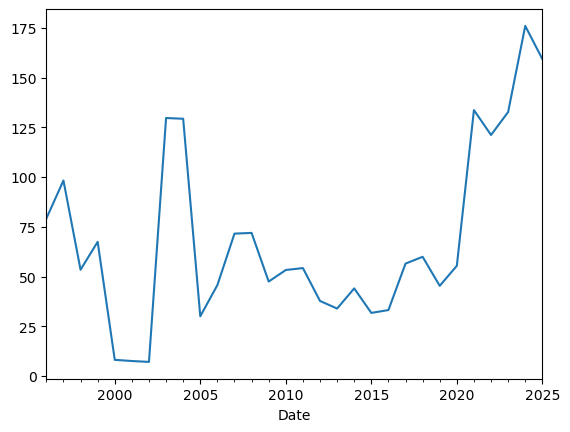

In [62]:
tata.resample(rule='A').max()['Open'].plot()

<Axes: xlabel='Date'>

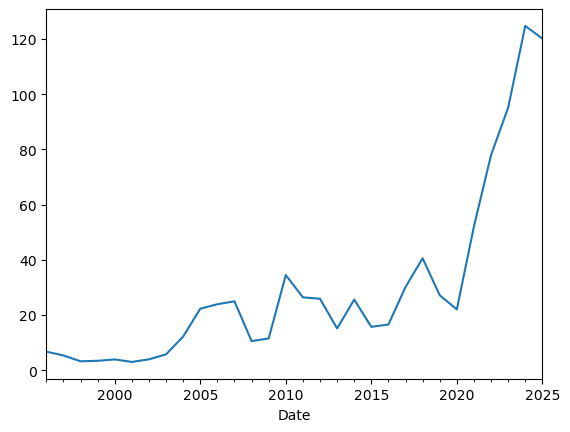

In [63]:
tata.resample(rule='A').min()['Open'].plot()

In [64]:
#quaterly frequency

tata.resample(rule = "Q").min()

,Price,High,Low,Open,Volume
Date,,,,,
1996-03-31,7.070782,7.070782,6.994097,6.994097,0
1996-06-30,9.014965,9.057818,8.893171,8.976622,0
1996-09-30,7.603063,7.691026,7.537656,7.569231,0
1996-12-31,6.678337,6.766299,6.585865,6.687357,0
1997-03-31,7.467738,7.706813,7.458716,7.706813,0
...,...,...,...,...,...
2024-06-30,152.259964,155.612656,141.914521,150.200476,27476795
2024-09-30,142.838913,146.483905,139.105975,144.627215,18275113
2024-12-31,133.760635,135.519594,132.988630,133.750845,5106804


In [65]:
tata.resample(rule = "Q").max()

,Price,High,Low,Open,Volume
Date,,,,,
1996-03-31,9.899095,10.059230,9.520182,9.969012,119682955
1996-06-30,11.933495,12.062055,11.775615,11.998903,339058664
1996-09-30,10.805779,10.945615,10.738116,10.941105,286435994
1996-12-31,79.163193,79.163193,79.163193,79.163193,257373746
1997-03-31,98.291145,98.291145,98.291145,98.291145,300926152
...,...,...,...,...,...
2024-06-30,175.839325,176.830398,174.119424,176.064066,125042158
2024-09-30,172.350677,174.129216,171.813231,172.966333,137414352
2024-12-31,163.223526,166.116082,161.337516,165.627471,88254789


<Axes: xlabel='Date'>

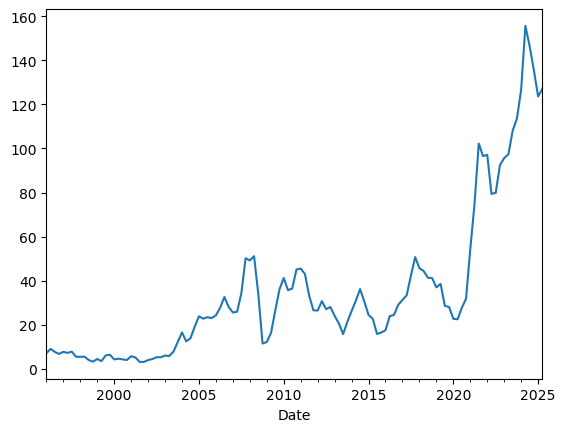

In [66]:
tata.resample(rule = "Q").min()['High'].plot()

<Axes: xlabel='Date'>

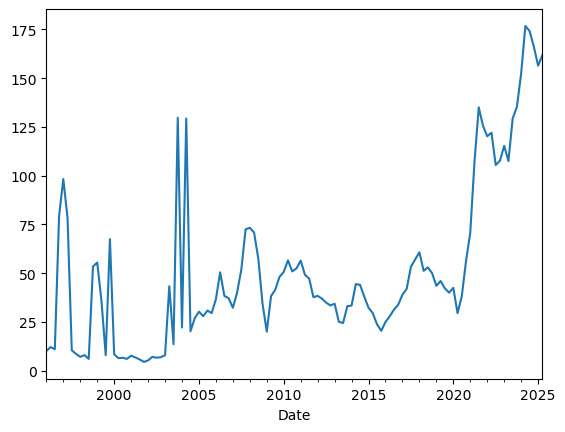

In [67]:
tata.resample(rule = "Q").max()['High'].plot()

In [68]:
# Business end frequency

tata.resample(rule = 'BQ').min()

,Price,High,Low,Open,Volume
Date,,,,,
1996-03-29,7.070782,7.070782,6.994097,6.994097,0
1996-06-28,9.014965,9.057818,8.893171,8.976622,0
1996-09-30,7.603063,7.691026,7.537656,7.569231,0
1996-12-31,6.678337,6.766299,6.585865,6.687357,0
1997-03-31,7.467738,7.706813,7.458716,7.706813,0
...,...,...,...,...,...
2024-06-28,152.259964,155.612656,141.914521,150.200476,27476795
2024-09-30,142.838913,146.483905,139.105975,144.627215,18275113
2024-12-31,133.760635,135.519594,132.988630,133.750845,5106804


<Axes: xlabel='Date'>

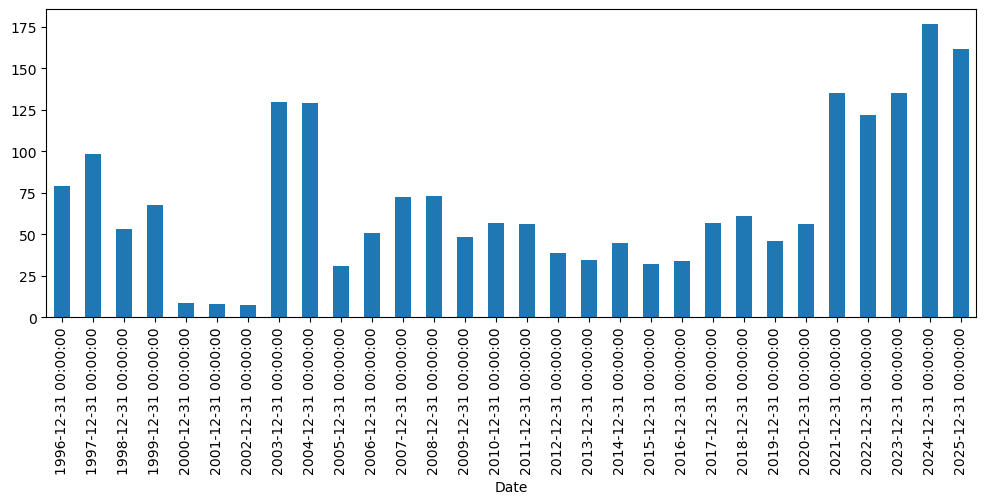

In [69]:
tata.resample(rule = "A").max()['High'].plot(kind = 'bar',figsize=(12,4))

<Axes: xlabel='Date'>

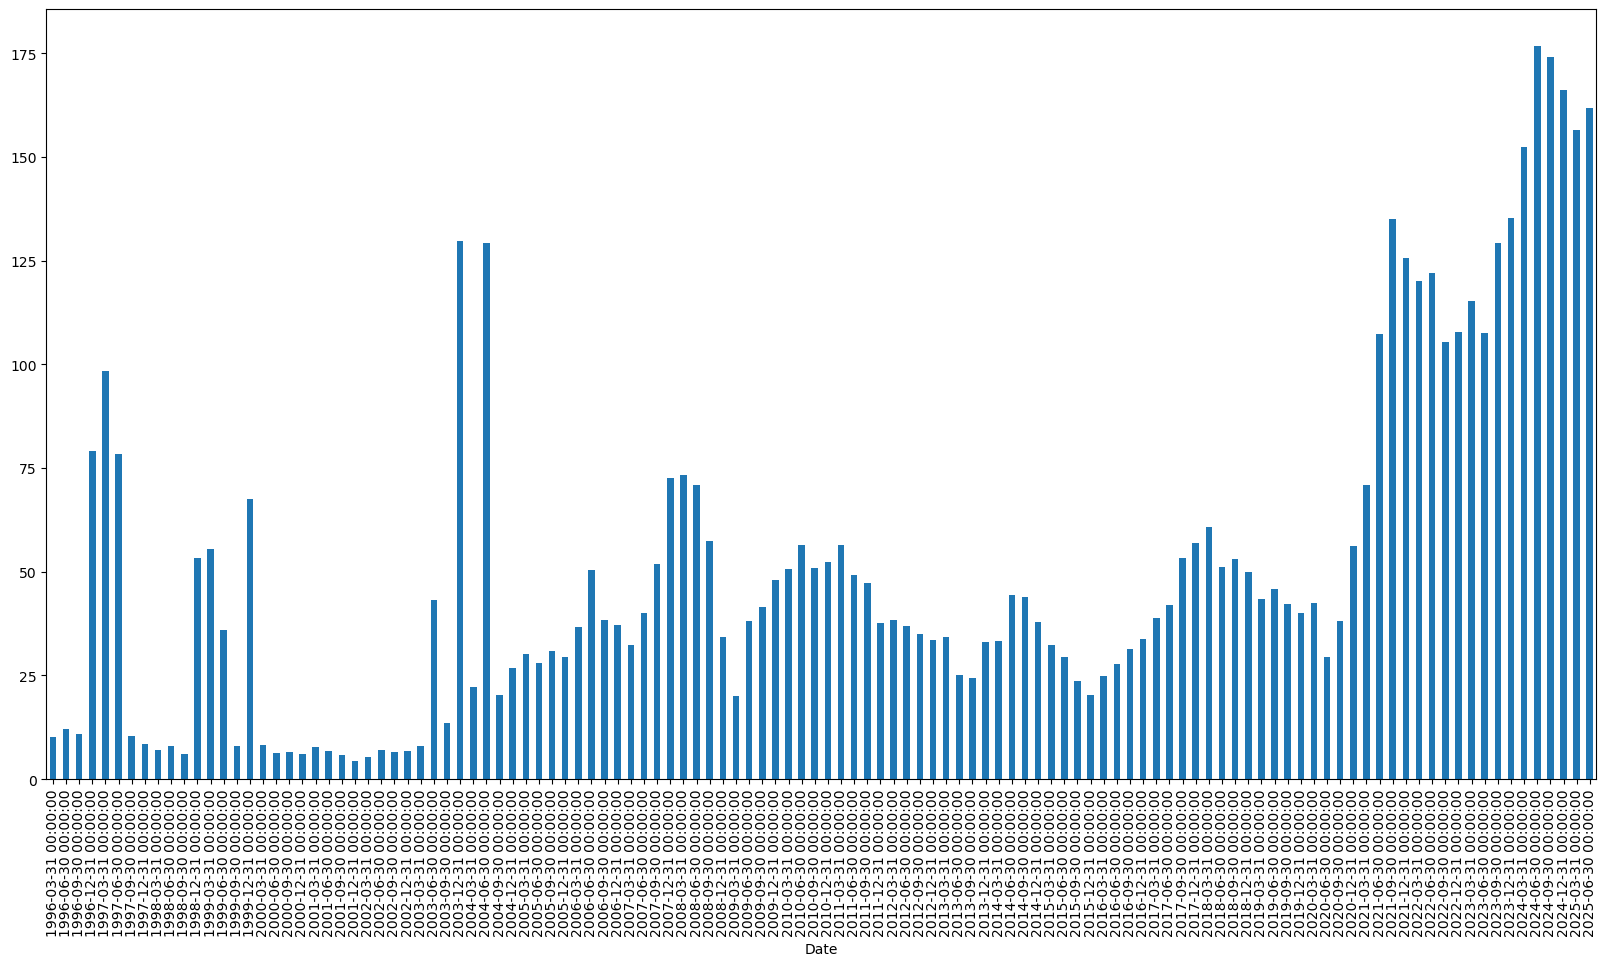

In [70]:
tata.resample(rule = "Q").max()['High'].plot(kind = 'bar',figsize = (20,10))

In [71]:
tata['High'].rolling(10).mean().head(20)

Date
1996-01-01         NaN
1996-01-02         NaN
1996-01-03         NaN
1996-01-04         NaN
1996-01-05         NaN
1996-01-08         NaN
1996-01-09         NaN
1996-01-10         NaN
1996-01-11         NaN
1996-01-12    8.532077
1996-01-15    8.449077
1996-01-16    8.359987
1996-01-17    8.262101
1996-01-18    8.166245
1996-01-19    8.082343
1996-01-22    8.017613
1996-01-23    7.974534
1996-01-24    7.986488
1996-01-25    7.889955
1996-01-26    7.767485
Name: High, dtype: float64

In [72]:
tata["Open 30 days rolling"] = tata["Open"].rolling(30).mean()

In [73]:
tata.head(31)

,Price,High,Low,Open,Volume,Open 30 days rolling
Date,,,,,,
1996-01-01,8.987900,9.010454,8.866107,8.976623,10242229,NaN
1996-01-02,8.820998,9.010455,8.798444,8.976624,16954313,NaN
1996-01-03,8.823254,9.021732,8.798444,8.820998,13514114,NaN
1996-01-04,8.543581,8.683418,8.345102,8.683418,34785820,NaN
1996-01-05,8.374422,8.480427,8.288716,8.439831,30138033,NaN
1996-01-08,8.060916,8.345100,7.988743,8.322547,36752157,NaN
1996-01-09,8.022573,8.090236,7.894013,7.894013,36964108,NaN
1996-01-10,7.979721,8.175943,7.894014,8.022574,35923053,NaN
1996-01-11,8.166923,8.207520,7.957167,7.984232,27719296,NaN


<Axes: xlabel='Date'>

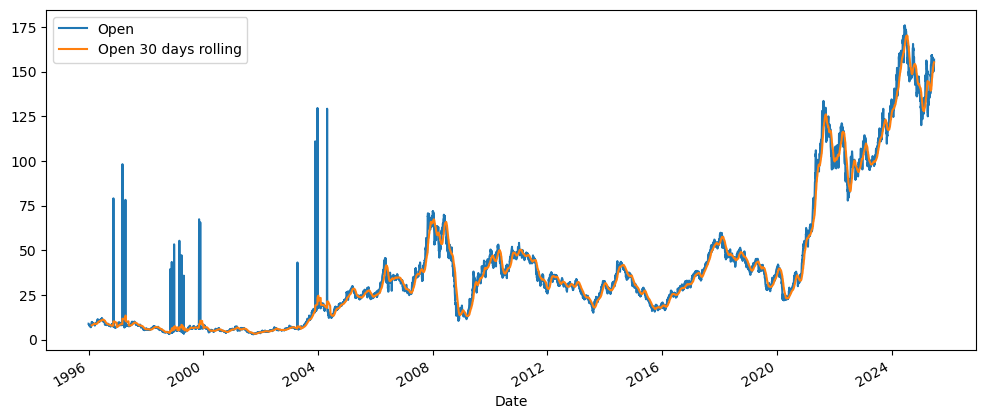

In [74]:
tata[["Open","Open 30 days rolling"]].plot(figsize = (12,5))

In [75]:
# Assignmkkents

max_price = tata.loc["2012-01-02":"2016-12-31"].max()['Price']

In [76]:
max_date = tata.loc["2012-01-02":"2016-12-31"].idxmax()['Price']

In [77]:
max_date.date(),max_price

(datetime.date(2014, 6, 9), 44.032997131347656)

In [78]:
min_price = tata.loc["2012-01-02":"2016-12-31"].min()['Price']

In [79]:
min_date = tata.loc["2012-01-02":"2016-12-31"].idxmin()['Price']

In [80]:
min_date.date(), min_price

(datetime.date(2013, 8, 6), 15.175211906433105)

In [85]:
tata["EWA_0.1"] = tata["Open"].ewm(alpha = 0.1,adjust = False).mean()

<Axes: xlabel='Date'>

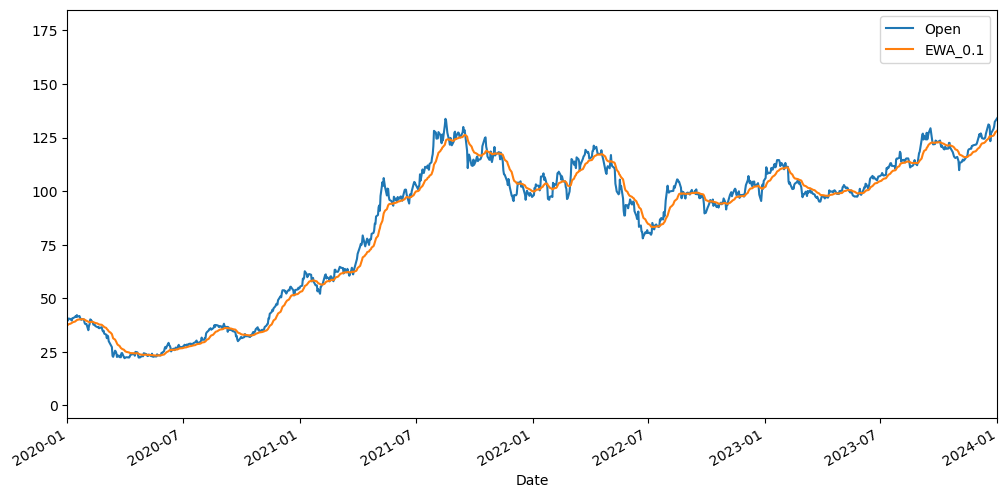

In [90]:
tata[["Open","EWA_0.1"]].plot(xlim = ("2020-01-01","2024-01-01"), figsize = (12,6))

In [87]:
tata["EWA_0.3"] = tata["Open"].ewm(alpha = 0.3,adjust = False).mean()

<Axes: xlabel='Date'>

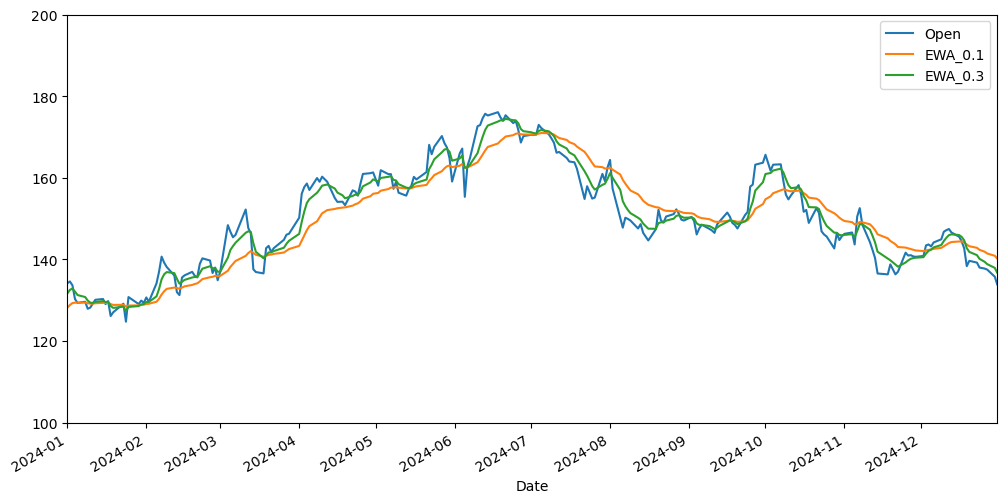

In [96]:
tata[["Open","EWA_0.1","EWA_0.3"]].plot(xlim = ("2024--01-01","2024-12-31"),ylim = (100,200),figsize = (12,6))

In [97]:
tata.isna().sum()

Price                    0
High                     0
Low                      0
Open                     0
Volume                   0
Open 30 days rolling    29
EWA_0.1                  0
EWA_0.3                  0
dtype: int64